In [143]:
# PANDAS Exercise

import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import sklearn
import math
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.manifold import MDS
lm = LinearRegression()
lg = LogisticRegression()

In [5]:
xlsx = pd.ExcelFile('Sales_train_test.xlsx')

In [6]:
df = pd.read_excel(xlsx, "Sheet1")

In [7]:
df.head()

,period,sales_a,sales_b,price_a,price_b,ads_b,influencers_b,period.1,set
0,1,45.454545,679548.408057,44.00,61.56,531000,93000,1,Train
1,4,206347.693481,401672.025723,52.46,62.20,256000,15000,4,Train
2,5,281893.004115,340984.883902,43.74,64.17,297000,0,5,Train
3,13,432531.908578,132211.967848,33.69,67.18,36000,111000,13,Train
4,14,467367.485934,134164.874552,33.77,69.75,54000,78000,14,Train


In [8]:
df.iloc[[0],[2]]

,sales_b
0,679548.408057


In [9]:
df.loc[[0],['period']] #0th row, period column

,period
0,1


In [10]:
df[['period', 'sales_b']].head()

,period,sales_b
0,1,679548.408057
1,4,401672.025723
2,5,340984.883902
3,13,132211.967848
4,14,134164.874552


In [11]:
df.sample(n=10) #get 10 random samples

,period,sales_a,sales_b,price_a,price_b,ads_b,influencers_b,period.1,set
13,27,447326.109752,60219.571700,28.61,73.78,15000,0,27,Train
4,14,467367.485934,134164.874552,33.77,69.75,54000,78000,14,Train
20,39,413521.015067,36974.492206,25.22,84.68,82000,0,39,Train
9,23,436342.202762,70489.977728,29.69,71.84,164000,0,23,Train
46,42,436985.759494,34411.247803,25.28,85.35,63000,0,42,Test
22,44,437086.359968,32779.991147,24.78,90.36,26000,0,44,Train
0,1,45.454545,679548.408057,44.00,61.56,531000,93000,1,Train
48,48,407815.631263,27059.965487,24.95,92.72,0,0,48,Test
28,6,331328.187384,283159.328189,37.57,66.09,193000,0,6,Test
2,5,281893.004115,340984.883902,43.74,64.17,297000,0,5,Train


In [12]:
df[df.period >=10].head()

,period,sales_a,sales_b,price_a,price_b,ads_b,influencers_b,period.1,set
3,13,432531.908578,132211.967848,33.69,67.18,36000,111000,13,Train
4,14,467367.485934,134164.874552,33.77,69.75,54000,78000,14,Train
5,15,468017.732742,119590.305828,31.58,69.32,22000,0,15,Train
6,17,468070.057258,102920.544023,29.69,69.85,26000,0,17,Train
7,21,471669.477234,82831.410076,29.65,71.06,40000,0,21,Train


In [13]:
df.sort_values(by='period', ascending = False)

,period,sales_a,sales_b,price_a,price_b,ads_b,influencers_b,period.1,set
25,50,431752.988048,27635.901240,25.10,94.37,0,0,50,Train
49,49,411943.319838,26948.051948,24.70,92.40,0,0,49,Test
48,48,407815.631263,27059.965487,24.95,92.72,0,0,48,Test
24,47,409751.283064,27896.440129,25.33,92.70,0,7000,47,Train
47,46,430973.797419,30470.103986,25.57,92.32,48000,0,46,Test
23,45,441267.942584,32139.766335,25.08,92.44,42000,0,45,Train
22,44,437086.359968,32779.991147,24.78,90.36,26000,0,44,Train
21,43,420064.076892,32359.445932,24.97,85.91,0,0,43,Train
46,42,436985.759494,34411.247803,25.28,85.35,63000,0,42,Test
45,41,462519.809826,38067.246649,25.24,85.06,0,0,41,Test


In [14]:
df.groupby(['set']).mean() #get mean of all columns grouped by set

,period,sales_a,sales_b,price_a,price_b,ads_b,influencers_b,period.1
set,,,,,,,,
Test,23.875,400912.033393,139859.885379,31.512917,74.815417,88583.333333,10958.333333,23.875
Train,27.000,412485.021693,111027.211383,29.852692,76.402692,71653.846154,13461.538462,27.000


In [15]:
df.groupby(['set'])['sales_a'].mean() #get mean of all columns grouped by set

set
Test     400912.033393
Train    412485.021693
Name: sales_a, dtype: float64

In [16]:
len(df) #number of rows

50

In [17]:
df['influencers_b'].nunique() #number of unique values in a column

11

In [18]:
df.describe()

,period,sales_a,sales_b,price_a,price_b,ads_b,influencers_b,period.1
count,50.00000,50.000000,50.000000,50.00000,50.000000,50.00000,50.0000,50.00000
mean,25.50000,406929.987309,124866.894901,30.64960,75.640800,79780.00000,12260.0000,25.50000
std,14.57738,99587.596086,148988.069777,7.56467,9.532509,112107.14445,32928.3762,14.57738
min,1.00000,45.454545,26948.051948,23.75000,61.560000,0.00000,0.0000,1.00000
25%,13.25000,412337.743645,42015.512018,25.22500,67.715000,0.00000,0.0000,13.25000
50%,25.50000,435654.017098,66032.327221,29.02000,74.080000,41000.00000,0.0000,25.50000
75%,37.75000,460656.896482,133676.647876,33.75000,82.070000,92250.00000,0.0000,37.75000
max,50.00000,473509.015257,679548.408057,54.97000,94.370000,531000.00000,158000.0000,50.00000


In [19]:
def add10(x):
    y = x + 10
    return y

In [20]:
add10(5)

15

In [21]:
df.period.apply(add10)

0     11
1     14
2     15
3     23
4     24
5     25
6     27
7     31
8     32
9     33
10    34
11    35
12    36
13    37
14    39
15    41
16    42
17    43
18    45
19    47
20    49
21    53
22    54
23    55
24    57
25    60
26    12
27    13
28    16
29    17
30    18
31    19
32    20
33    21
34    22
35    26
36    28
37    29
38    30
39    38
40    40
41    44
42    46
43    48
44    50
45    51
46    52
47    56
48    58
49    59
Name: period, dtype: int64

In [22]:
tbl1 = df[['period', 'sales_a']]
tbl2 = df[['period', 'sales_b']]

In [23]:
pd.merge(tbl1, tbl2, how='left', on='period')

,period,sales_a,sales_b
0,1,45.454545,679548.408057
1,4,206347.693481,401672.025723
2,5,281893.004115,340984.883902
3,13,432531.908578,132211.967848
4,14,467367.485934,134164.874552
5,15,468017.732742,119590.305828
6,17,468070.057258,102920.544023
7,21,471669.477234,82831.410076
8,22,442158.516020,75310.910119
9,23,436342.202762,70489.977728


In [24]:
import matplotlib.pyplot as plt

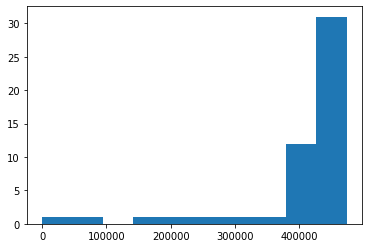

In [25]:
plt.hist(df.sales_a);

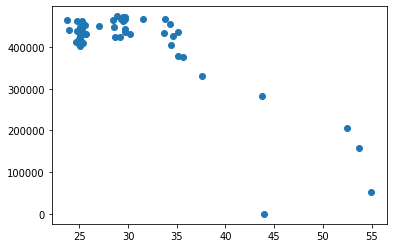

In [26]:
plt.scatter(df.price_a, df.sales_a)

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import sklearn
import math

In [28]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

In [29]:
train = df.loc[df['set']=='Train'] #create training set
test = df.loc[df['set']=='Test'] #create test set

In [30]:
ind_var = train[['sales_a', 'price_a', 'price_b', 'ads_b','influencers_b']]

In [31]:
lm.fit(ind_var, train.sales_b)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [32]:
lm.intercept_ # list alpha value /intercept

557842.1086638928

In [33]:
lm.coef_ #list beta values/ coefficients 

array([-8.30173281e-01,  3.39344804e+03, -2.91142538e+03,  1.64365832e-01,
        3.69859633e-01])

In [34]:
pd.DataFrame(list(zip(ind_var.columns, lm.coef_)), columns=['features','coefficient'])

,features,coefficient
0,sales_a,-0.830173
1,price_a,3393.448044
2,price_b,-2911.425382
3,ads_b,0.164366
4,influencers_b,0.369860


In [35]:
lm.score(ind_var, train.sales_b)

0.974632600179567

In [36]:
lm.predict(ind_var)

array([649563.94336858, 431092.94002175, 334241.97130932, 164472.97184366,
       119095.73598874,  78267.4221507 ,  70924.77480612,  66579.19152385,
        90308.17230638, 114153.14009926,  57189.53447252,  88463.05534261,
        46353.9403019 ,  71230.99597296,  41552.02814894,  58873.85308085,
        48512.00723554,  29790.21146291,  62331.45258134,  72077.21475997,
        67069.26750484,  43729.97898815,  20271.44794604,  14392.13271069,
        36333.46525707,   9836.64678098])

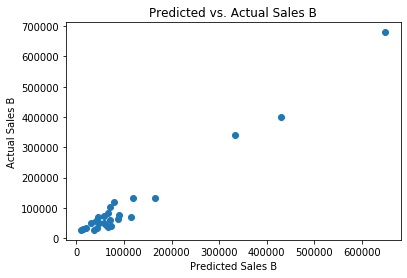

In [37]:
plt.scatter(lm.predict(ind_var), train.sales_b) #visualize predicted vs. actual Y
plt.xlabel('Predicted Sales B')
plt.ylabel('Actual Sales B')
plt.title('Predicted vs. Actual Sales B');

In [38]:
ind_var_test = test[['sales_a', 'price_a', 'price_b', 'ads_b', 'influencers_b']] # create test independent variables

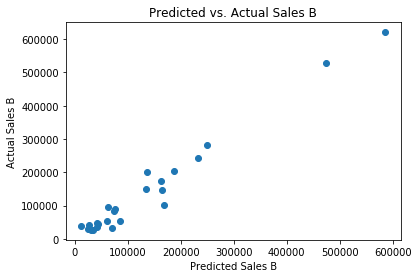

In [39]:
plt.scatter(lm.predict(ind_var_test), test.sales_b) #visualize predicted vs. actual Y for the testing set
plt.xlabel('Predicted Sales B')
plt.ylabel('Actual Sales B')
plt.title('Predicted vs. Actual Sales B');

In [40]:
lm.score(ind_var_test, test.sales_b) # test fit (R2) for testing

0.96381629510622

In [41]:
xl = pd.ExcelFile("usage_data.xlsx")
df = xl.parse("Sheet1")

In [42]:
train = df.loc[df['set'] == 'Train'] # create training set
test = df.loc[df['set'] == 'Test'] # create testing set

In [43]:
ind_var = train[['price', 'income', 'channel', 'age', 'gender']] # select independent variables

In [44]:
ind_var

,price,income,channel,age,gender
0,10,33,4,37,1
1,20,21,3,55,1
3,20,76,1,44,1
4,30,24,3,37,1
5,20,22,2,32,0
...,...,...,...,...,...
741,20,28,2,38,0
744,10,55,2,55,1
747,10,55,4,36,1
748,30,21,4,37,1


In [45]:
len(ind_var)

505

In [46]:
ind_var.tail()

,price,income,channel,age,gender
741,20,28,2,38,0
744,10,55,2,55,1
747,10,55,4,36,1
748,30,21,4,37,1
749,30,28,2,38,0


In [47]:
channel_dummies = pd.get_dummies(ind_var['channel'], prefix='channel')
gender_dummies = pd.get_dummies(ind_var['gender'], prefix='gender') # create dummy variables

In [48]:
ind_var = ind_var.join(channel_dummies)
ind_var = ind_var.join(gender_dummies) # join dummies

In [49]:
ind_var = ind_var.drop('channel', axis=1) # remove channel
ind_var = ind_var.drop('gender', axis=1) # remove gender
ind_var = ind_var.drop('channel_1', axis=1)
ind_var = ind_var.drop('gender_0', axis=1) # remove redundant dummies

In [50]:
ind_var

,price,income,age,channel_2,channel_3,channel_4,channel_5,channel_6,gender_1
0,10,33,37,0,0,1,0,0,1
1,20,21,55,0,1,0,0,0,1
3,20,76,44,0,0,0,0,0,1
4,30,24,37,0,1,0,0,0,1
5,20,22,32,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
741,20,28,38,1,0,0,0,0,0
744,10,55,55,1,0,0,0,0,1
747,10,55,36,0,0,1,0,0,1
748,30,21,37,0,0,1,0,0,1


In [51]:
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression()

In [52]:
lg.fit(ind_var, train.use)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [53]:
lg.score(ind_var, train.use)

0.7742574257425743

In [54]:
len(ind_var)

505

In [55]:
len(lg.predict(ind_var))

505

In [66]:
train_out = train.copy(deep=True)

In [67]:
lg.predict(ind_var)

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,

In [68]:
train_out['pred_use'] = lg.predict(ind_var)

In [69]:
train_out.tail()

,record,price,income,channel,age,gender,use,set,pred_use
741,742,20,28,2,38,0,1,Train,0
744,745,10,55,2,55,1,0,Train,0
747,748,10,55,4,36,1,0,Train,0
748,749,30,21,4,37,1,0,Train,0
749,750,30,28,2,38,0,0,Train,0


In [71]:
sklearn.metrics.confusion_matrix(train_out.use, train_out.pred_use)

array([[318,  23],
       [ 91,  73]], dtype=int64)

In [72]:
pd.DataFrame(lg.predict(ind_var))

,0
0,0
1,0
2,0
3,0
4,0
...,...
500,0
501,0
502,0
503,0


In [73]:
lg.predict_proba(ind_var)

array([[0.8794716 , 0.1205284 ],
       [0.931235  , 0.068765  ],
       [0.51852117, 0.48147883],
       ...,
       [0.81913814, 0.18086186],
       [0.89576824, 0.10423176],
       [0.69322474, 0.30677526]])

In [74]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3)

In [75]:
xl = pd.ExcelFile("clustering_data.xlsx")
df = xl.parse("Sheet1")
df1 = xl.parse("Sheet2")

In [76]:
train = df.drop(['record_id'], axis=1)
test = df1.drop(['record_id'], axis=1)

In [77]:
km.fit(train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [78]:
km.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2])

In [79]:
km.cluster_centers_

array([[178. , 322.6],
       [ 55.5,  48.4],
       [350.5,  98. ]])

In [80]:
km.predict(test)

array([0, 2, 2, 0, 2, 2, 2, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 1, 2, 2, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 2, 2, 2, 1, 0, 0, 2, 0, 2, 2, 1, 0, 0, 1, 2,
       0, 2, 0, 0, 1, 0, 0, 2, 2, 0, 0, 0, 0, 2, 2, 0, 0, 1, 0, 0, 2, 2,
       1, 0, 0, 0, 0, 2, 1, 0, 0, 2, 2, 1, 2, 2, 1, 1, 2, 0, 0, 0, 2, 0,
       2, 0, 1, 2, 2, 0, 0, 2, 0, 0, 2, 0])

In [81]:
output=km.predict(test)
output1 = pd.DataFrame(output, columns=['cluster'])
output2 = df1.join(output1, how='inner')

In [82]:
train_output = train.copy(deep=True)
train_output['cluster'] = km.predict(train)

In [83]:
train_output.head()

,x_axis,y_axis,cluster
0,84,47,1
1,58,51,1
2,79,75,1
3,65,29,1
4,19,54,1


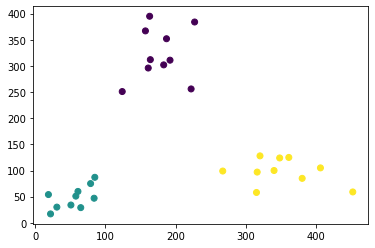

In [84]:
plt.scatter(train_output['x_axis'], train_output['y_axis'], c=train_output['cluster'].astype(float))

In [85]:
test_output = test.copy(deep=True)
test_output['cluster'] = km.predict(test)

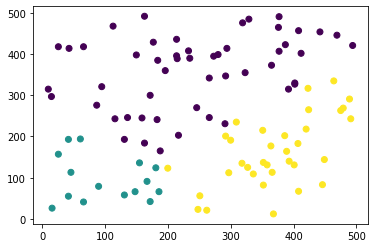

In [86]:
plt.scatter(test_output['x_axis'], test_output['y_axis'], c=test_output['cluster'].astype(float))

In [88]:
from sklearn.metrics import silhouette_score
km = KMeans(n_clusters=6)
km.fit(train)
silhouette_score(km.fit_transform(train), km.labels_)

0.5037692640130814

In [110]:
# Multi-dimensional Scaling
from sklearn.manifold import MDS
md = MDS(n_components = 2, n_init = 1, dissimilarity = 'precomputed')

In [175]:
xl = pd.ExcelFile("correlation_matrix.xlsx")
df = xl.parse("Sheet1")

In [176]:
df.rename(columns={'Unnamed: 0': 'label'}, inplace=True)

In [178]:
df.set_index('label', inplace=True)

In [179]:
df.head()

,BISCUITS,BLEACH,BODY SOAP,CAKES,CANDIES,CANNED GOODS,CANNED MILK,CHOCOLATES,COFFEE,COOKING OIL,...,SAUCES,SEASONING,SHAMPOO,SNACKS,SOFT DRINKS,SPREADS,SUGAR,TOOTHPASTE,WAFER,WATER
label,,,,,,,,,,,,,,,,,,,,,
BISCUITS,1.000000,0.211717,0.238832,0.441859,0.426567,0.317196,0.156054,0.343079,0.316785,0.103469,...,0.224420,0.299625,0.296001,0.414971,0.123058,0.146063,0.151199,0.225515,0.358036,0.120712
BLEACH,0.211717,1.000000,0.287218,0.195154,0.200227,0.253716,0.138194,0.165977,0.205188,0.104928,...,0.222582,0.266080,0.294805,0.174716,0.090019,0.143124,0.138289,0.239001,0.178328,0.085563
BODY SOAP,0.238832,0.287218,1.000000,0.204934,0.199419,0.287051,0.139380,0.173619,0.255032,0.108243,...,0.229080,0.291727,0.408148,0.192987,0.074028,0.164396,0.179594,0.326095,0.175901,0.082486
CAKES,0.441859,0.195154,0.204934,1.000000,0.376989,0.275965,0.154167,0.325045,0.273927,0.091295,...,0.218018,0.262251,0.255782,0.320588,0.144434,0.138442,0.118472,0.209551,0.324862,0.125619
CANDIES,0.426567,0.200227,0.199419,0.376989,1.000000,0.297759,0.155839,0.448764,0.304448,0.087279,...,0.236901,0.303649,0.276944,0.428608,0.137653,0.131372,0.113800,0.212038,0.368146,0.120471


In [146]:
df1 = md.fit_transform(df)

In [154]:
df2 = pd.DataFrame(df1, columns = ['x_axis', 'y_axis'])

In [180]:
df3 = pd.DataFrame(df.index, columns=['label'])

In [183]:
df3.head()

,label
0,BISCUITS
1,BLEACH
2,BODY SOAP
3,CAKES
4,CANDIES


In [184]:
df4 = df2.join(df3, how='inner')

In [185]:
df4

,x_axis,y_axis,label
0,-0.174163,-0.081886,BISCUITS
1,-0.099362,-0.069145,BLEACH
2,0.148054,0.010590,BODY SOAP
3,0.147867,-0.067820,CAKES
4,0.200806,-0.005084,CANDIES
5,0.062908,0.200284,CANNED GOODS
6,-0.037472,-0.052652,CANNED MILK
7,-0.088377,0.091378,CHOCOLATES
8,-0.140895,0.094313,COFFEE
9,-0.000238,-0.012218,COOKING OIL


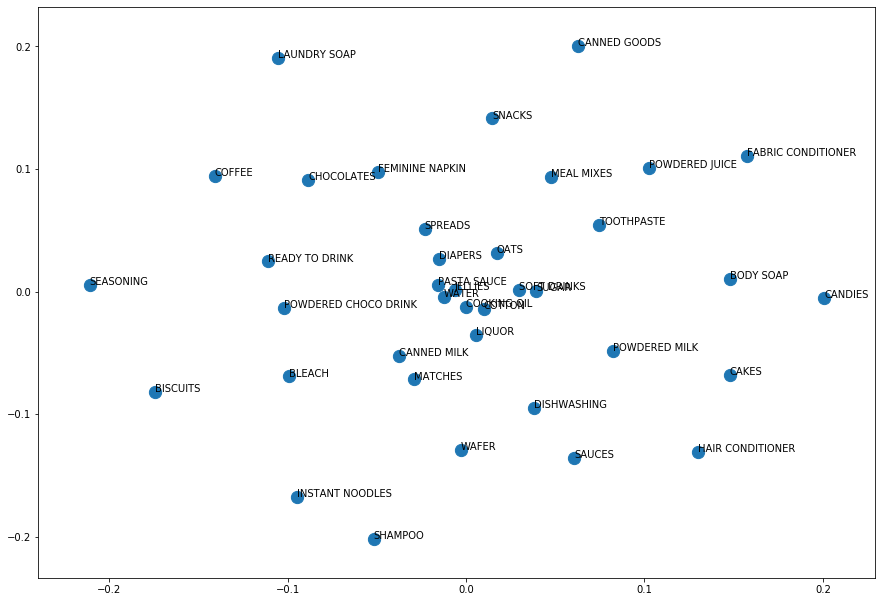

In [186]:
fig = plt.gcf()
fig.set_size_inches(15, 10.5)
plt.scatter(df4.x_axis, df4.y_axis, 150)
for i, txt in enumerate(df4.label):
    plt.annotate(txt, (df4.x_axis[i], df4.y_axis[i]))

In [187]:
train = df4.drop(['label'], axis = 1)
train.head()

,x_axis,y_axis
0,-0.174163,-0.081886
1,-0.099362,-0.069145
2,0.148054,0.010590
3,0.147867,-0.067820
4,0.200806,-0.005084


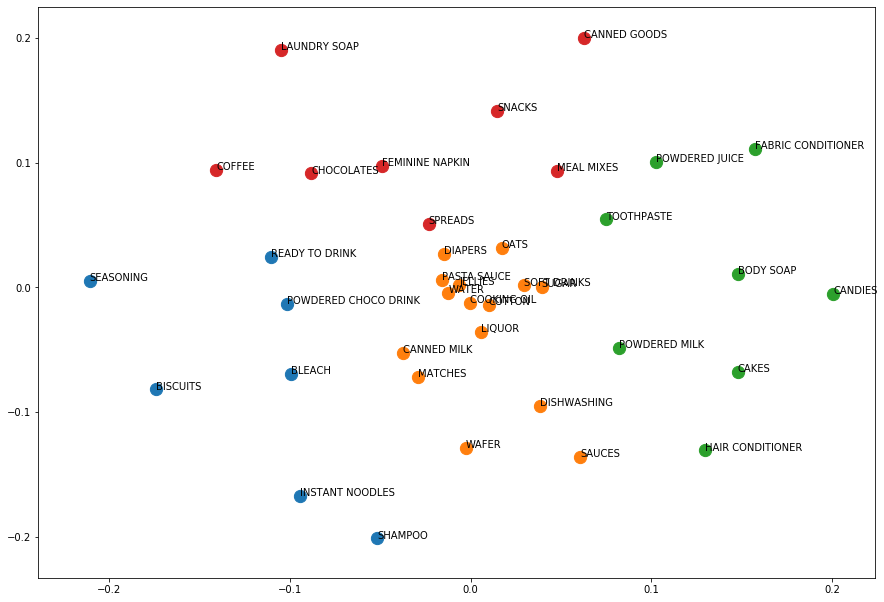

In [188]:
fig = plt.gcf()
fig.set_size_inches(15, 10.5)
km = KMeans(n_clusters=4)
km.fit(train)
toutput = km.predict(train)
toutput1 = pd.DataFrame(toutput, columns = ['cluster'])
toutput2 = df4.join(toutput1, how='inner')
tds0 = toutput2[toutput2.cluster==0]
tds1 = toutput2[toutput2.cluster==1]
tds2 = toutput2[toutput2.cluster==2]
tds3 = toutput2[toutput2.cluster==3]
tds4 = toutput2[toutput2.cluster==4]
tdsc = pd.DataFrame(km.cluster_centers_, columns = ['x_axis', 'y_axis'])
plt.scatter(tds0.x_axis, tds0.y_axis, 150)
plt.scatter(tds1.x_axis, tds1.y_axis, 150)
plt.scatter(tds2.x_axis, tds2.y_axis, 150)
plt.scatter(tds3.x_axis, tds3.y_axis, 150)
plt.scatter(tds4.x_axis, tds4.y_axis, 150)
for i, txt in enumerate(df4.label):
    plt.annotate(txt, (df4.x_axis[i], df4.y_axis[i]))
#plt.axis([-0.05,0.05,-.1,.1])

In [189]:
km = KMeans(n_clusters=4)
km.fit(train)
silhouette_score(km.fit_transform(train), km.labels_)

0.3251756134190919